In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
!ls ../data/cleaned

2016-2021_fieldgoals_stats_cleaned.csv
2016-2021_fumbles_stats_cleaned.csv
2016-2021_interceptions_stats_cleaned.csv
2016-2021_passing_stats_cleaned.csv
2016-2021_receiving_stats_cleaned.csv
2016-2021_rushing_stats_cleaned.csv
2016-2021_tackling_stats_cleaned.csv
2017-2021_aggregated_team_defensive_stats_with_sb_cleaned.csv
2017-2021_aggregated_team_offensive_stats_with_sb_cleaned.csv
all_superbowl_winning_rosters_cleaned.csv


# Notebook Introduction: Exploring trends in super-bowl winning players over the decades
This notebook looks to explore the trends within superbowl winning teams, in order to give an indication on particular common attributes that these championship players have, as well as what these trends some attributes have followed or evolved over the decades of super bowl winning rosters (dating from 1966 to 2022). 

## Investigate trends per position for superbowl winning teams across the decades

In [59]:
sb_rosters = pd.read_csv('../data/cleaned/all_superbowl_winning_rosters_cleaned.csv')
sb_rosters.head()

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,approx_value,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year,positional_group,conference_name
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,3.0,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019,offensive_line,big ten
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,0.0,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019,defensive_backs,pac-12
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,0.0,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN,special_teamers,big 12
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,0.0,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,fbs independent
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,0.0,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015,offensive_line,big 12


In [60]:
sb_rosters.isna().sum()

year                           0
team                           0
no.                            0
player                         0
age                            0
position                       0
games_played                   0
games_started                  1
weight                         0
height                         0
college                        6
date_of_birth                  0
years_in_league                0
approx_value                   4
drafted_(tm/rnd/pick/yr)       0
player_additional              0
salary                      3049
drafted_team/undrafted         0
drafted_round                717
drafted_pick                 718
drafted_year                 718
positional_group               3
conference_name              772
dtype: int64

In [61]:
# Adding decade column
sb_rosters['year'] = sb_rosters['year'].astype(str)
sb_rosters['decade'] = sb_rosters['year'].str[:3] + '0s'

In [62]:
# Creating positional groupings for lighter visualisation.

positional_groups = {'offensive_line':['LT', 'T', 'LG', 'G', 'C', 'RG', 'RT', 'ROT'], 'receiver':['WR', 'TE','SE', 'FL'],
                    'running_backs':['RB', 'HB', 'TB', 'FB', 'LH,' 'RH', 'BB' 'B', 'WB'], 'special_teamers':[ 'LS', 'K', 'P', 'PR', 'KR', 'RET'],
                    'defensive_line':['DL', 'E', 'LE', 'RE', 'LDE', 'DE', 'LDT', 'DT', 'NT', 'MG' , 'DG', 'RDT', 'RDE'], 
                    'linebacker':['LOLB', 'RUSH', 'OLB', 'LLB', 'WILL', 'ILB', 'SLB', 'MLB', 'WLB', 'RILB', 'ROLB', 'SAM', 'LB'],
                    'defensive_backs':['LCB', 'CB', 'RCB', 'SS', 'FS', 'LDH', 'RDH', 'S', 'RS', 'DB'],
                    'Quarterback':['QB']}

In [63]:
def get_position(row):
    for position, positions_list in positional_groups.items():
        if any(pos in row['position'] for pos in positions_list):
            return position
    return None

sb_rosters['positional_group'] = sb_rosters.apply(get_position, axis=1)

In [64]:
def get_position(row):
    for position, positions_list in positional_groups.items():
        if any(pos in row['position'] for pos in positions_list):
            return position
    return None

# Apply the function to create a new column
sb_rosters['positional_group'] = sb_rosters.apply(get_position, axis=1)

In [65]:
grouped_position = sb_rosters.groupby(['decade', 'position']).agg({'age':'mean', 'years_in_league':'mean', 'player':'count'}).reset_index()
grouped_position.head()

,decade,position,age,years_in_league,player
0,1960s,C,25.571429,3.000000,7
1,1960s,DB,25.272727,1.454545,11
2,1960s,DE,25.000000,0.600000,5
3,1960s,DT,24.000000,1.400000,5
4,1960s,E,34.500000,12.500000,2


In [66]:
grouped_positional_group = sb_rosters.groupby(['decade', 'positional_group']).agg({'age':'mean', 'years_in_league':'mean', }).reset_index()
grouped_positional_group

,decade,positional_group,age,years_in_league
0,1960s,Quarterback,31.000000,8.727273
1,1960s,defensive_backs,26.500000,2.900000
2,1960s,defensive_line,27.823529,4.764706
3,1960s,linebacker,25.428571,3.190476
4,1960s,offensive_line,26.904762,4.238095
5,1960s,receiver,27.153846,4.307692
6,1960s,running_backs,26.130435,3.565217
7,1960s,special_teamers,30.000000,6.833333
8,1970s,Quarterback,29.086957,6.173913
9,1970s,defensive_backs,25.313725,2.843137


offensive_line 0.724963151207353
running_backs 0.49230922899517005
Quarterback 0.6779809147687641
receiver 0.6580409340526113
defensive_backs 0.7674181516698506
linebacker 0.9054076968096816
defensive_line 0.5146001962147494
special_teamers 0.9313939027614634


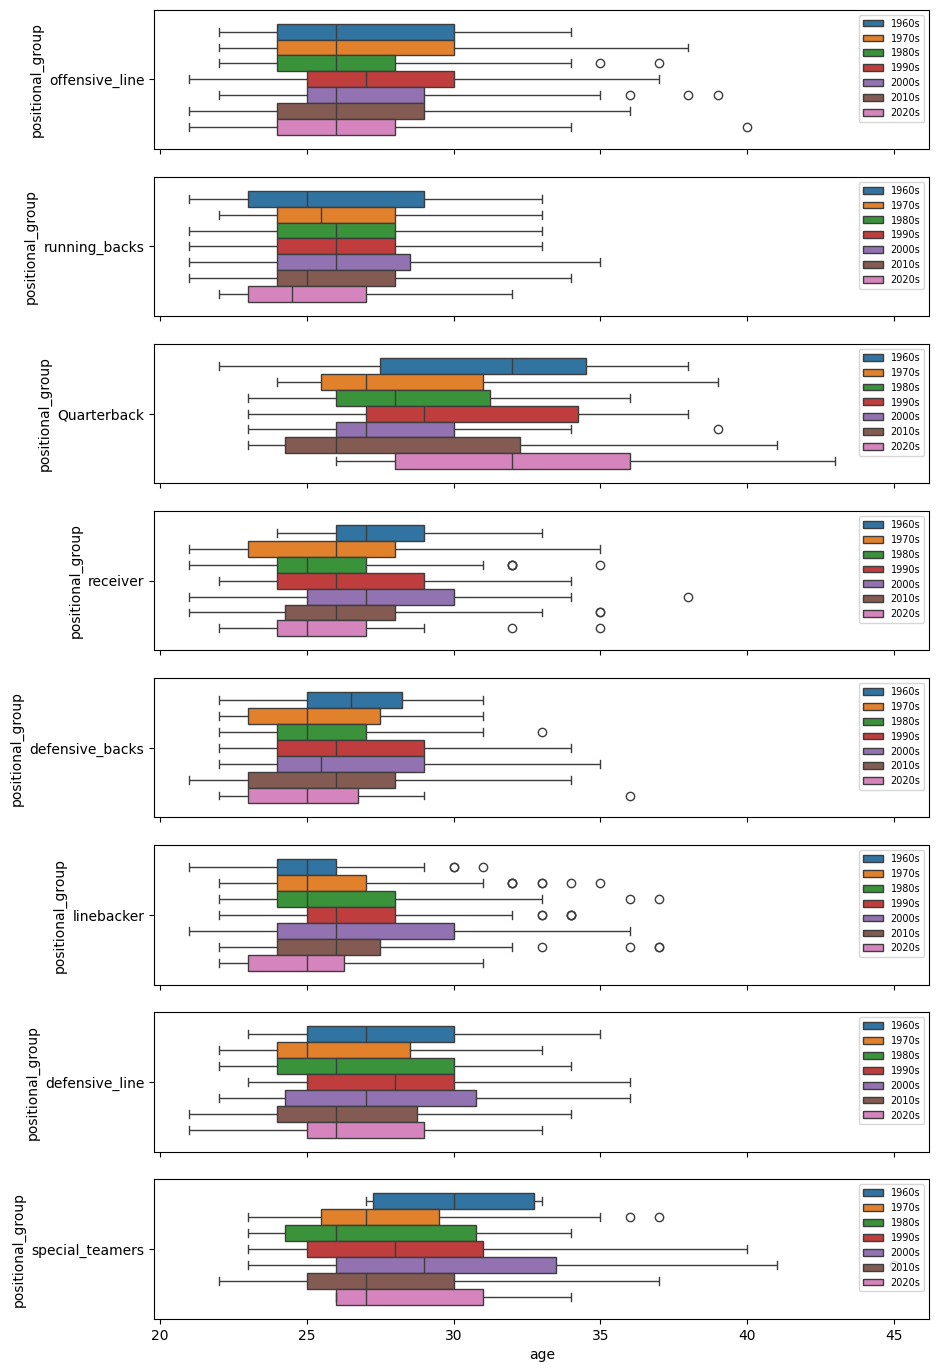

In [67]:
# Creating list of groupings and decade order for the following for loop and order of decades in the hue. 

groupings = ['offensive_line','running_backs', 'Quarterback', 'receiver','defensive_backs', 'linebacker',  'defensive_line', 'special_teamers']
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

# Creating a for loop with a boxplot per positional group to visualise the general distribution of age per positional group, by decade. 
# the for loop also generates a skewness per positional group which helps indicate the level of change that takes place in the whole dataframe
# for the given positional group, indicating variance over all decades. 

fig, ax = plt.subplots(len(groupings), 1, figsize=(10, 17), sharex=True)
i = 0
#plt.xlim(sb_rosters['age'].min(), sb_rosters['age'].max())
for group in groupings:
    data = sb_rosters.loc[sb_rosters['positional_group'] == group]
    sns.boxplot(data=data, x='age', y='positional_group', hue='decade', hue_order=decade_order , ax=ax[i]
               ).legend(fontsize=7, loc='upper right')
    print(group, data['age'].skew())
    i += 1
plt.show()

### Conclusion to EDA on Age per position trends
When looking at the players on super bowl winning rosters throughout the decades, the trends per age indicate whether the player is in or near their prime. 

#### Defensive players
Defensive linemen particularly haven't changed too much in terms of age and tend to be around 25 and 28 when they are on super bowl winning rosters. 
Linebackers' age ranges have centered around 24-28, likely because they do similar jobs to defensive linemen but veer a little on the younger side due to the more athletic demands of the position, relative to linemen. 
Defensive backs are only slightly younger with their lower age range and actually have higher upper ranges relative to linebackers which was surprising. This might be due to the lesser physical nature of the position compared to linebacker, while maintaining similar heights and other stature measures. 

#### Offensive players
Offensive linemen and quarterbacks have tended to be the oldest on the field throughout the years when winning superbowls, suggesting that there is a certain pedigree and number of years in the NFL required in order to be put in a best position for winning. 

Receivers looked to have become decreasingly younger, suggesting the game has shifted to a more receiver-dependent playing style, which can be supported by the fact that passing became more frequent in recent decades. The shorter IQRs of receivers ages' also indicate the shorter 'superbowl winning prime' ages for receivers, linebackers and running backs. 

---

## Investigation into 'years_in_league'
This section of the notebook will aim to identify potential trends in terms of years players have already recorded in the league when winning a super bowl championship, in order to indicate when positional groups are typically in their prime for winning a super bowl, and split this across the decades. 

First we will be comparing the average 'years in the league' of these superbowl winning positions and seeing what the trend is over the decades, and then also looking into the average 'years in the league' for those winning their first super bowl, since players who win multiple super bowls will be naturally increasing their statistic 'years in the league'.  

In [68]:
print("% of superbowl winning players who have won more than 1 superbowl: " + str(round(abs(sb_rosters.drop_duplicates(subset='player', keep='first').shape[0] - sb_rosters.shape[0]) 
                       / sb_rosters.shape[0] * 100, 2)))

% of superbowl winning players who have won more than 1 superbowl: 23.49


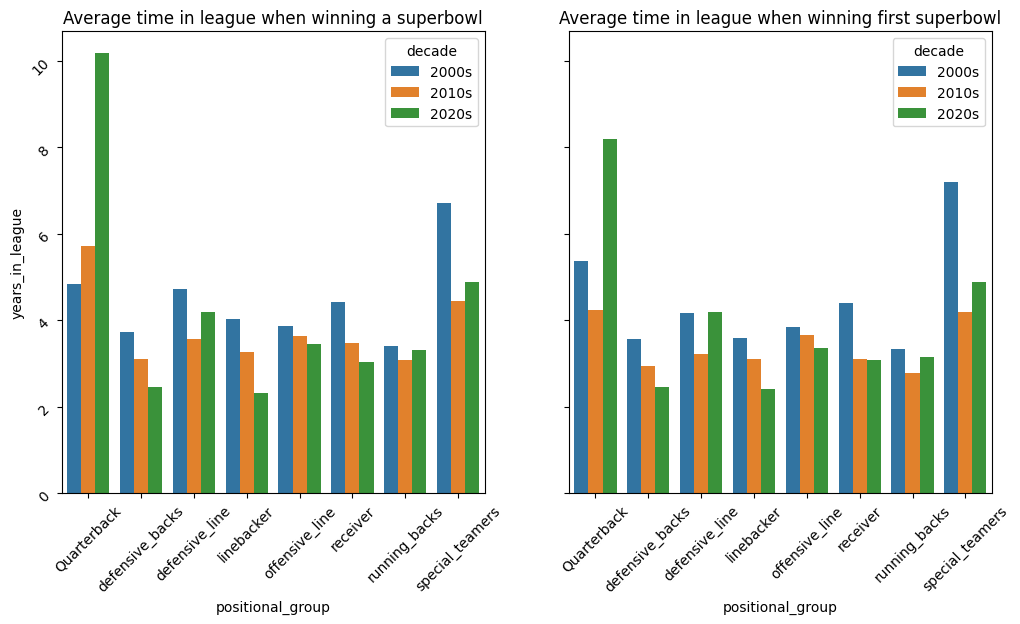

In [69]:
# Looking at the average years in league when winning a championship per positional group.

grouped_positional_years = sb_rosters.groupby(['decade', 'positional_group']).agg({'years_in_league':'mean'}).reset_index()

# filtering df to only include player's first super bowl based on player name. 
first_super_bowl = sb_rosters.drop_duplicates(subset='player', keep='first')
first_super_bowl_pos_grouped = first_super_bowl.groupby(['decade', 'positional_group']).agg({'years_in_league':'mean'}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

g = sns.barplot(data=grouped_positional_years.loc[grouped_positional_years['decade'].isin(
    ['2000s', '2010s', '2020s'])], x='positional_group', y='years_in_league', 
            hue='decade', ax=ax[0])
g.set_title('Average time in league when winning a superbowl')
ax[0].tick_params(labelrotation=45)
f = sns.barplot(data=first_super_bowl_pos_grouped.loc[first_super_bowl_pos_grouped['decade'].isin(
    ['2000s', '2010s', '2020s'])], x='positional_group', y='years_in_league', 
            hue='decade', ax=ax[1])
f.set_title('Average time in league when winning first superbowl')
ax[1].tick_params(labelrotation=45)
plt.show()

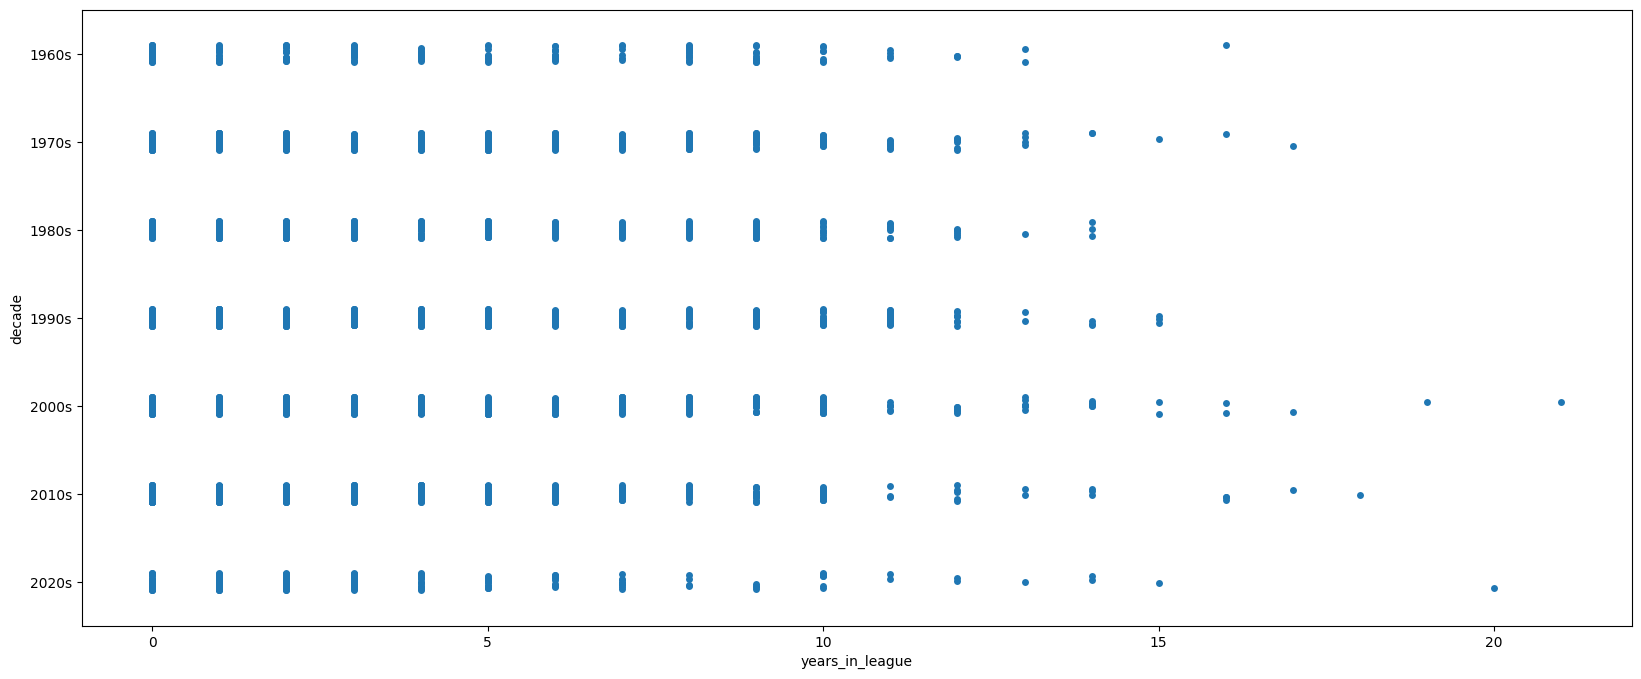

In [70]:
# Looking at a visualisation for potential trend in 'years_in_league' against decade for super bowl winning players. 
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

data = sb_rosters.sort_values('decade', ascending=True)

plt.subplots(figsize=(20,8))
sns.stripplot(data=data, x ='years_in_league', y ='decade' )
plt.show()

In [71]:
sb_rosters

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year,positional_group,conference_name,decade
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019,offensive_line,big ten,2020s
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019,defensive_backs,pac-12,2020s
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN,special_teamers,big 12,2020s
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,fbs independent,2020s
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015,offensive_line,big 12,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,1966,greenbay,63.0,Fuzzy Thurston,33.0,LG,12,12.0,247.0,6-1,...,Philadelphia Eagles / 5th / 54th pick / 1956,ThurFu20,NaN,Philadelphia Eagles,5th,54th pick,1956,offensive_line,NaN,1960s
3155,1966,greenbay,37.0,Phil Vandersea,23.0,LB,14,0.0,245.0,6-3,...,Denver Broncos / 9th / 65th pick / 1965 Green ...,VandPh20,NaN,Denver Broncos,9th,65th pick,1965 Green Bay Packers,linebacker,fbs independent,1960s
3156,1966,greenbay,73.0,Jim Weatherwax,23.0,DT,14,1.0,260.0,6-7,...,San Diego Chargers / 5th / 38th pick / 1965 Gr...,WeatJi22,NaN,San Diego Chargers,5th,38th pick,1965 Green Bay Packers,offensive_line,NaN,1960s
3157,1966,greenbay,24.0,Willie Wood,30.0,SS,14,14.0,190.0,5-10,...,Undrafted,WoodWi00,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,pac-12,1960s


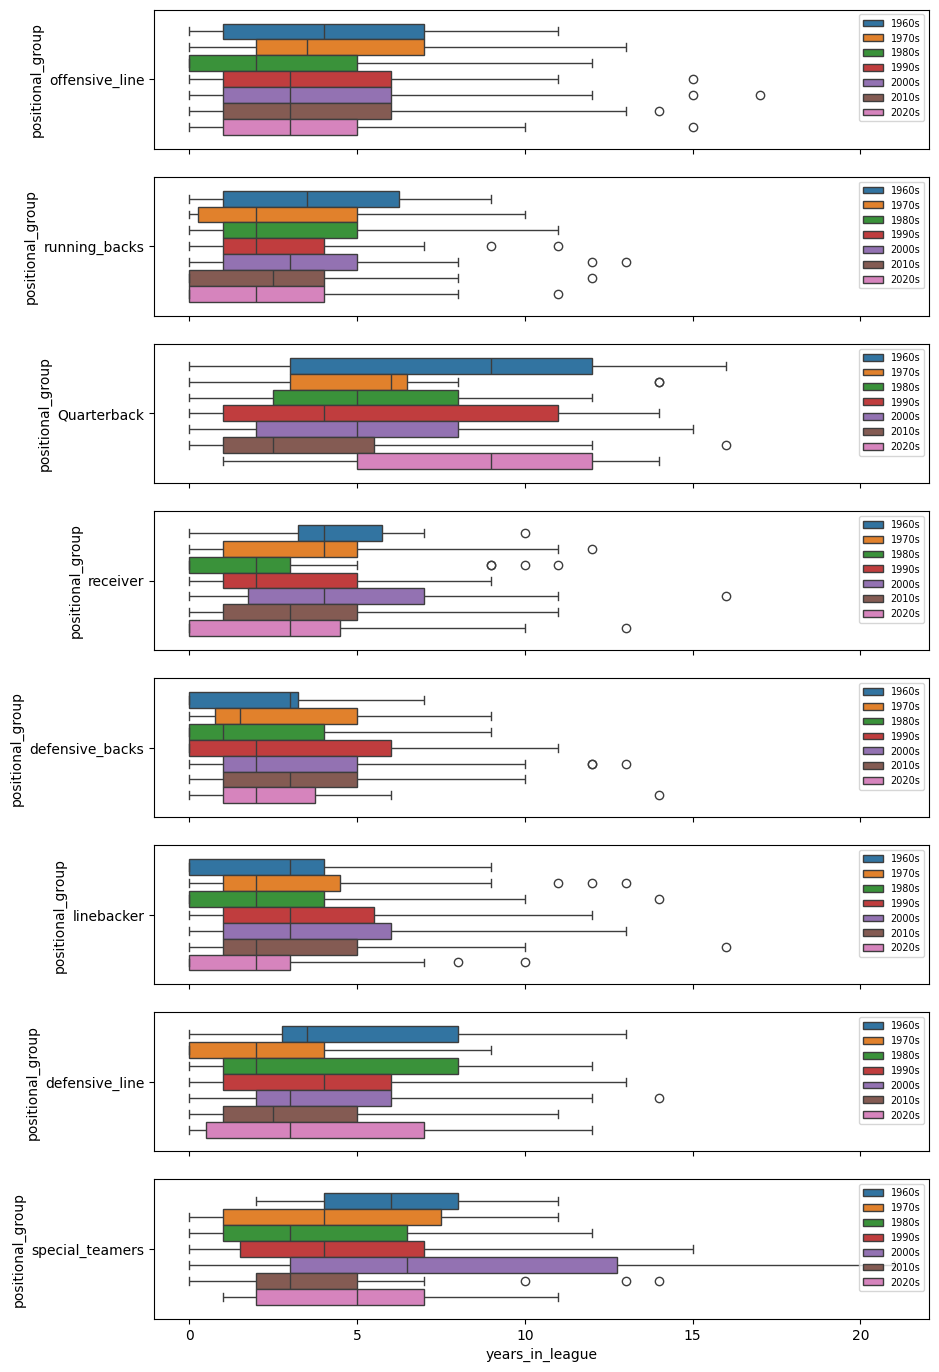

In [72]:
groupings = ['offensive_line','running_backs', 'Quarterback', 'receiver','defensive_backs', 'linebacker',  'defensive_line', 'special_teamers']

fig, ax = plt.subplots(len(groupings), 1, figsize=(10, 17), sharex=True)
i = 0
#plt.xlim(sb_rosters['age'].min(), sb_rosters['age'].max())
for group in groupings:
    data = first_super_bowl.loc[first_super_bowl['positional_group'] == group]
    sns.boxplot(data=data, x='years_in_league', y='positional_group', hue='decade', hue_order=decade_order , ax=ax[i]
               ).legend(fontsize=7, loc='upper right')
    #for decade in decade_order:
    #    print(group, data.loc[data['decade'] == decade ]['years_in_league'].skew())
    i += 1
plt.show()

### Conclusion: Years in league before first super bowl

When looking at the average number of years in the nfl before a player typically finds themselves on a super bowl winning roster, one can see there is a general downward trend in the average number of years in the league across the last three decades, all apart from quarterbacks which has seen somewhat of a steady increase. This further supports the previous claim that quarterbacks with more years in the league has a higher likelihood to lead a team to a superbowl. 

Another insight of interest is that the typical rookie contract is around 3 years, which coincides with the general average time in league when winning a championship. This can suggest multiple assumptions.

- Teams draft/sign young players with the intent that they will win a championship by the last year of that player's contract. These 3 year contracts typically apply to players who have been drafted in the first 4 rounds of the draft.
- Players who finish their rookie contract (assuming 2-3 years) will sign a new contract and win relatively soon after signing that new contract. Teams therefore might be looking for players who are finishing their rookie contract to bring those into their organisation to boost their chances of winning.

What this would mean for a general manager or team looking to build a super-bowl calibre team: 

- If you are looking to win within the next 3 years, the players you sign in the next year are the most significant. Look to sign a quarterback who has already been in the league for 2-3 years and shows potential to grow further.
- If you are looking to win a superbowl in the next year, be confident the players you have in your team for at least the last 2 years are the some of the best in their position across the whole league. The chances of winning super bowls with those players will decrease after the next 2 years. 
- This increases the worth of quarterbacks who have been in the league for 4+ years and are still playing at a high level, as their chances of winning a super bowl remain strong until they've been in the league for about 8-9 years, provided they remain healthy. 



## Super Bowl Player Draft Split Exploration

In [73]:
sb_rosters

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year,positional_group,conference_name,decade
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019,offensive_line,big ten,2020s
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019,defensive_backs,pac-12,2020s
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN,special_teamers,big 12,2020s
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,fbs independent,2020s
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015,offensive_line,big 12,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,1966,greenbay,63.0,Fuzzy Thurston,33.0,LG,12,12.0,247.0,6-1,...,Philadelphia Eagles / 5th / 54th pick / 1956,ThurFu20,NaN,Philadelphia Eagles,5th,54th pick,1956,offensive_line,NaN,1960s
3155,1966,greenbay,37.0,Phil Vandersea,23.0,LB,14,0.0,245.0,6-3,...,Denver Broncos / 9th / 65th pick / 1965 Green ...,VandPh20,NaN,Denver Broncos,9th,65th pick,1965 Green Bay Packers,linebacker,fbs independent,1960s
3156,1966,greenbay,73.0,Jim Weatherwax,23.0,DT,14,1.0,260.0,6-7,...,San Diego Chargers / 5th / 38th pick / 1965 Gr...,WeatJi22,NaN,San Diego Chargers,5th,38th pick,1965 Green Bay Packers,offensive_line,NaN,1960s
3157,1966,greenbay,24.0,Willie Wood,30.0,SS,14,14.0,190.0,5-10,...,Undrafted,WoodWi00,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,pac-12,1960s


In [74]:
# Grouping by decade, team that won SB, team that drafted (or undrafted) and the number of players from draft team in said sb-winning team 
drafted_sbw = sb_rosters.groupby(['decade', 'team','drafted_team/undrafted']).agg({
    'drafted_team/undrafted':'count'}).rename(columns={'drafted_team/undrafted':'total_drafted'}).reset_index()


# Grouping by decade, team that won the superbowl, team that drafted, position, and number of players of that position that won a superbowl in that decade for said team
drafted_sbw_pos = sb_rosters.groupby(['decade', 'position', 'team', 'drafted_team/undrafted']).agg({
    'drafted_team/undrafted':'count'}).rename(columns={'drafted_team/undrafted':'total_drafted'}).reset_index()


In [75]:
drafted_sbw_pos.sort_values('total_drafted', ascending=False)

,decade,position,team,drafted_team/undrafted,total_drafted
360,1970s,WR,pittsburgh,Pittsburgh Steelers,16
277,1970s,RB,pittsburgh,Pittsburgh Steelers,13
1446,2010s,DB,newengland,New England Patriots,12
1150,2000s,LB,newengland,Undrafted,12
674,1990s,DB,dallas,Dallas Cowboys,11
...,...,...,...,...,...
826,1990s,LLB,denver,Denver Broncos,1
825,1990s,LLB,dallas,Undrafted,1
823,1990s,LILB,newyork,Dallas Cowboys,1
822,1990s,LG,washington,Washington Redskins,1


In [76]:
drafted_sbw.sort_values('total_drafted', ascending=False)

,decade,team,drafted_team/undrafted,total_drafted
103,1970s,pittsburgh,Pittsburgh Steelers,142
162,1980s,sanfrancisco,San Francisco 49ers,98
198,1990s,dallas,Dallas Cowboys,88
497,2010s,newengland,New England Patriots,88
351,2000s,newengland,New England Patriots,81
...,...,...,...,...
381,2000s,newyork,Detroit Lions,1
380,2000s,newyork,Denver Broncos,1
379,2000s,newyork,Chicago Bears,1
31,1960s,kansas,Pittsburgh Steelers,1


### Visualisation of draft by teams

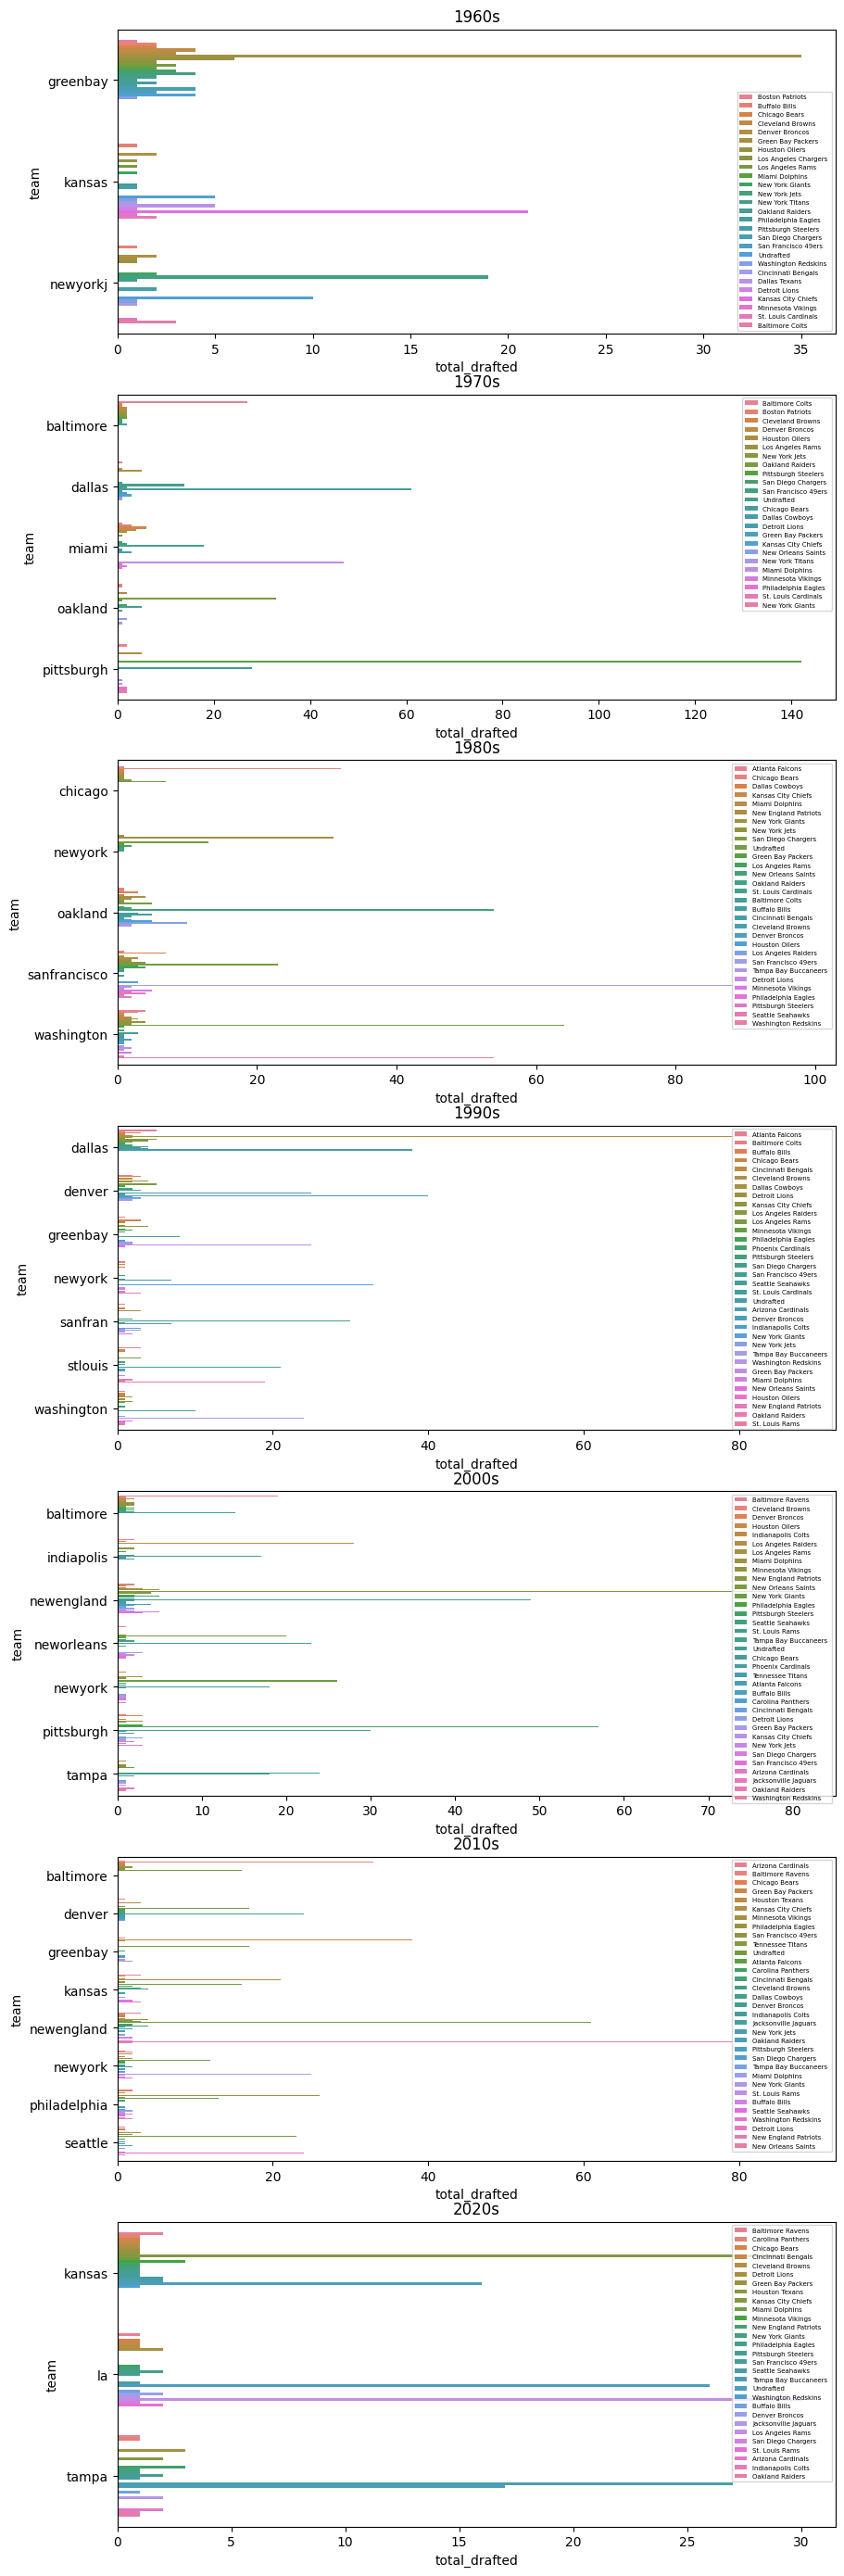

In [77]:
# Plot split by decade to show the teams that drafted the most players which won SBs for teams who won superbowls in that decade.

# Conclusion: Teams that won the most superbowls traditionally drafted the most players themselves or signed a lot through
# undrafted players

fig, ax = plt.subplots(7,1, figsize=(10, 35))
sns.color_palette()

i = 0
for decade in drafted_sbw['decade'].unique():
    data=drafted_sbw.loc[drafted_sbw['decade'] == decade]
    sns.barplot(data=data, y='team', x='total_drafted', hue='drafted_team/undrafted', ax=ax[i]).legend(fontsize='5')
    ax[i].set_title(decade)
    i += 1
plt.show()

In [78]:
# Filtering out any rows where total_drafted < n to make visualisation a bit lighter and easier to digest

n = 3

display(drafted_sbw.shape)
display(drafted_sbw.loc[drafted_sbw['total_drafted'] > n].shape)
drafted_sbw_filtered = drafted_sbw.loc[drafted_sbw['total_drafted'] > n]


(614, 4)

(111, 4)

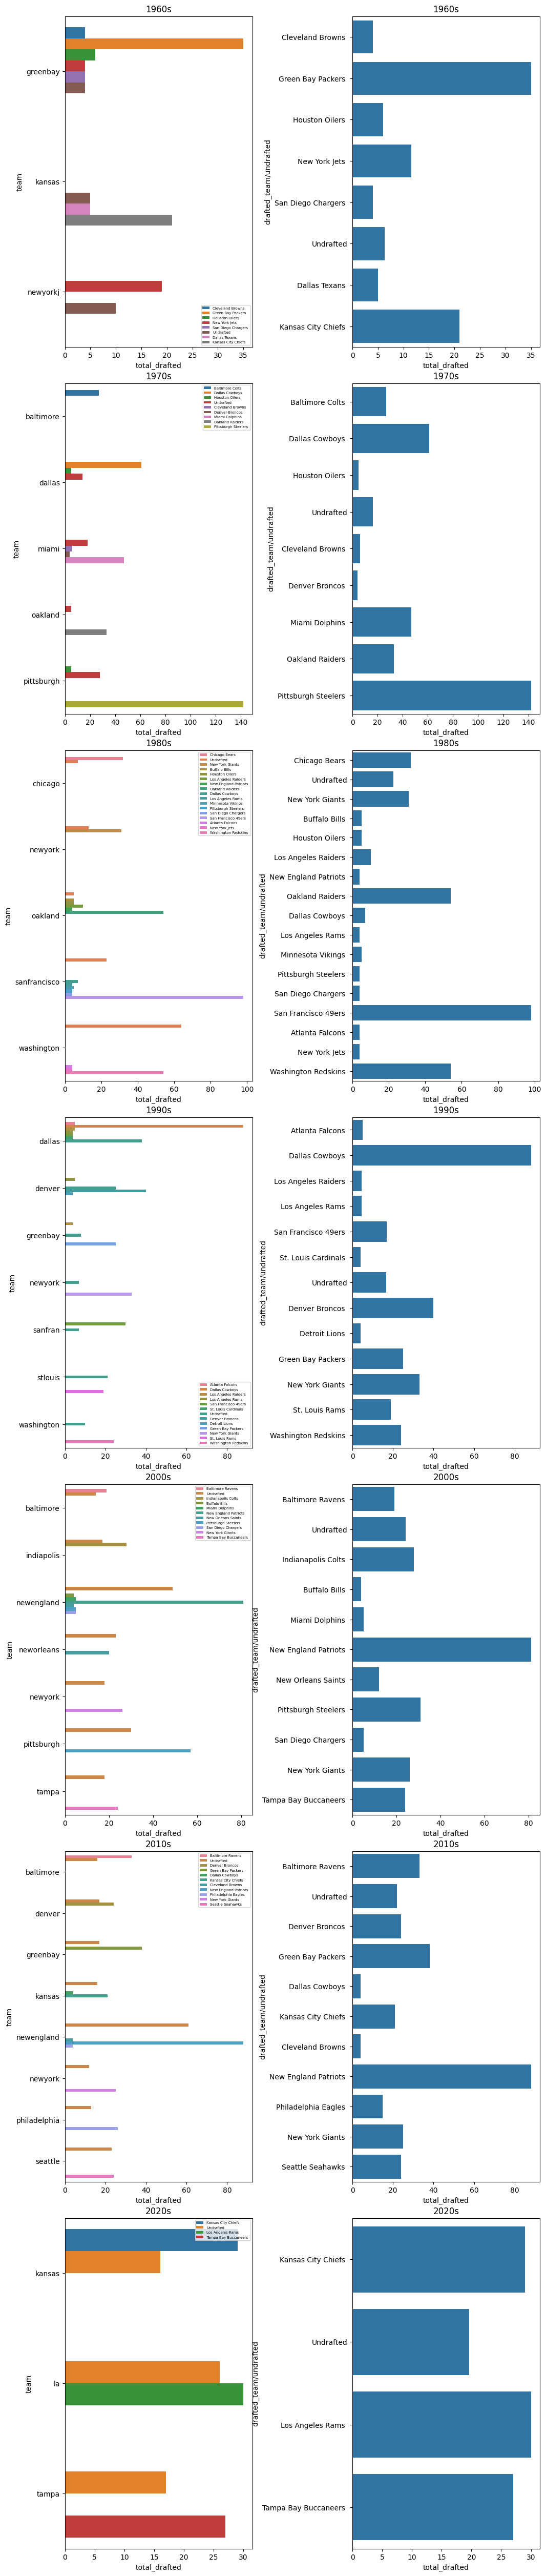

In [79]:
# Creating same graphs as before, with filtered dataframes where total_drafted > n, split by decade
# left column includes super bowl winning team
# right column removes this from the graph and simply show the players drafted

fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_filtered['decade'].unique():
    data=drafted_sbw_filtered.loc[drafted_sbw_filtered['decade'] == decade]
    sns.barplot(data=data, y='team', x='total_drafted', hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data, y='drafted_team/undrafted', x='total_drafted', errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

In [80]:
# Grouping number of teams involved a SB-winning's roster.

decade_grouped_teams_to_player_drafting = drafted_sbw.groupby('decade').agg({
    'team':'nunique', 'drafted_team/undrafted':'nunique', 'total_drafted':'sum'}).reset_index()
decade_grouped_teams_to_player_drafting

,decade,team,drafted_team/undrafted,total_drafted
0,1960s,3,27,174
1,1970s,5,24,465
2,1980s,5,30,537
3,1990s,7,34,557
4,2000s,7,35,596
5,2010s,8,33,621
6,2020s,3,29,209


In [81]:
# Adding column for Average no. of teams drafting to winning teams per decade
decade_grouped_teams_to_player_drafting['teamsdrafts_to_sb_winners'] = round(decade_grouped_teams_to_player_drafting[
                                                                             'drafted_team/undrafted']/decade_grouped_teams_to_player_drafting['team'], 2)

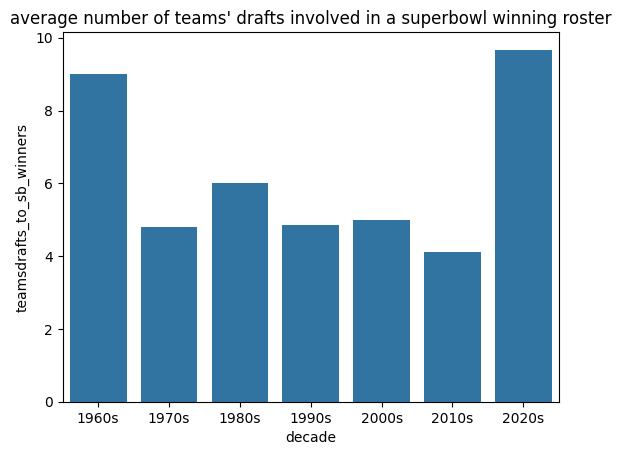

In [82]:
# Barplot to show the average number of teams' drafts involved in a superbowl winning roster. 

sns.barplot(data=decade_grouped_teams_to_player_drafting, x='decade', y='teamsdrafts_to_sb_winners').set_title("average number of teams' drafts involved in a superbowl winning roster")
plt.show()

In [83]:
drafted_sbw_pos.head()

,decade,position,team,drafted_team/undrafted,total_drafted
0,1960s,C,greenbay,Green Bay Packers,1
1,1960s,C,greenbay,New York Jets,2
2,1960s,C,greenbay,Oakland Raiders,1
3,1960s,C,kansas,Dallas Texans,1
4,1960s,C,kansas,St. Louis Cardinals,1


In [84]:
drafted_sbw_pos_group = sb_rosters.groupby([
    'decade', 'drafted_team/undrafted', 'positional_group']).agg({'player':'count'}).reset_index().rename(
    columns=({'player':'total_drafted'}))
drafted_sbw_pos_group.head()

,decade,drafted_team/undrafted,positional_group,total_drafted
0,1960s,Baltimore Colts,offensive_line,2
1,1960s,Baltimore Colts,receiver,1
2,1960s,Boston Patriots,offensive_line,1
3,1960s,Buffalo Bills,defensive_backs,2
4,1960s,Buffalo Bills,linebacker,2


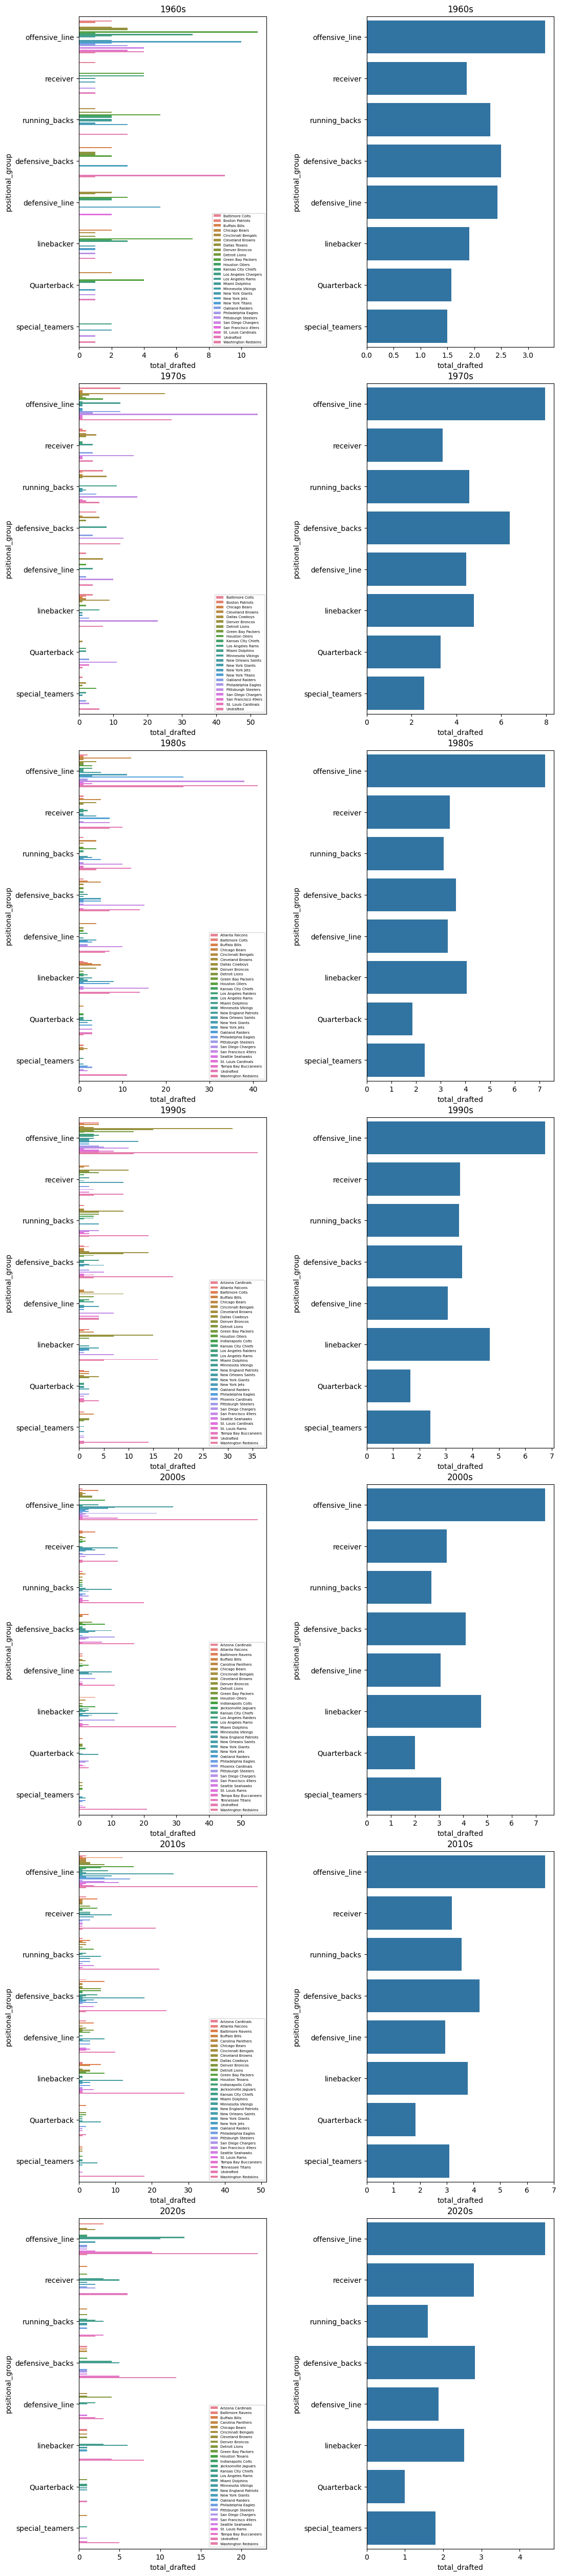

In [85]:
# Plot to show which positions were drafted/signed the most by decade, and by which teams

# Conclusion: Overall players that were on superbowl winning teams included a lot of offensive linemen throughout the decades
# Defensive back and linebackers tended to be the next sought after group in terms of overall numbers

positions_order = ['offensive_line', 'receiver', 'running_backs', 'defensive_backs', 'defensive_line', 'linebacker', 'Quarterback', 'special_teamers']

fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_pos_group['decade'].unique():
    data=drafted_sbw_pos_group.loc[drafted_sbw_pos_group['decade'] == decade]
    sns.barplot(data=data, y='positional_group', x='total_drafted', order=positions_order, 
                hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data, y='positional_group', x='total_drafted', order=positions_order, errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

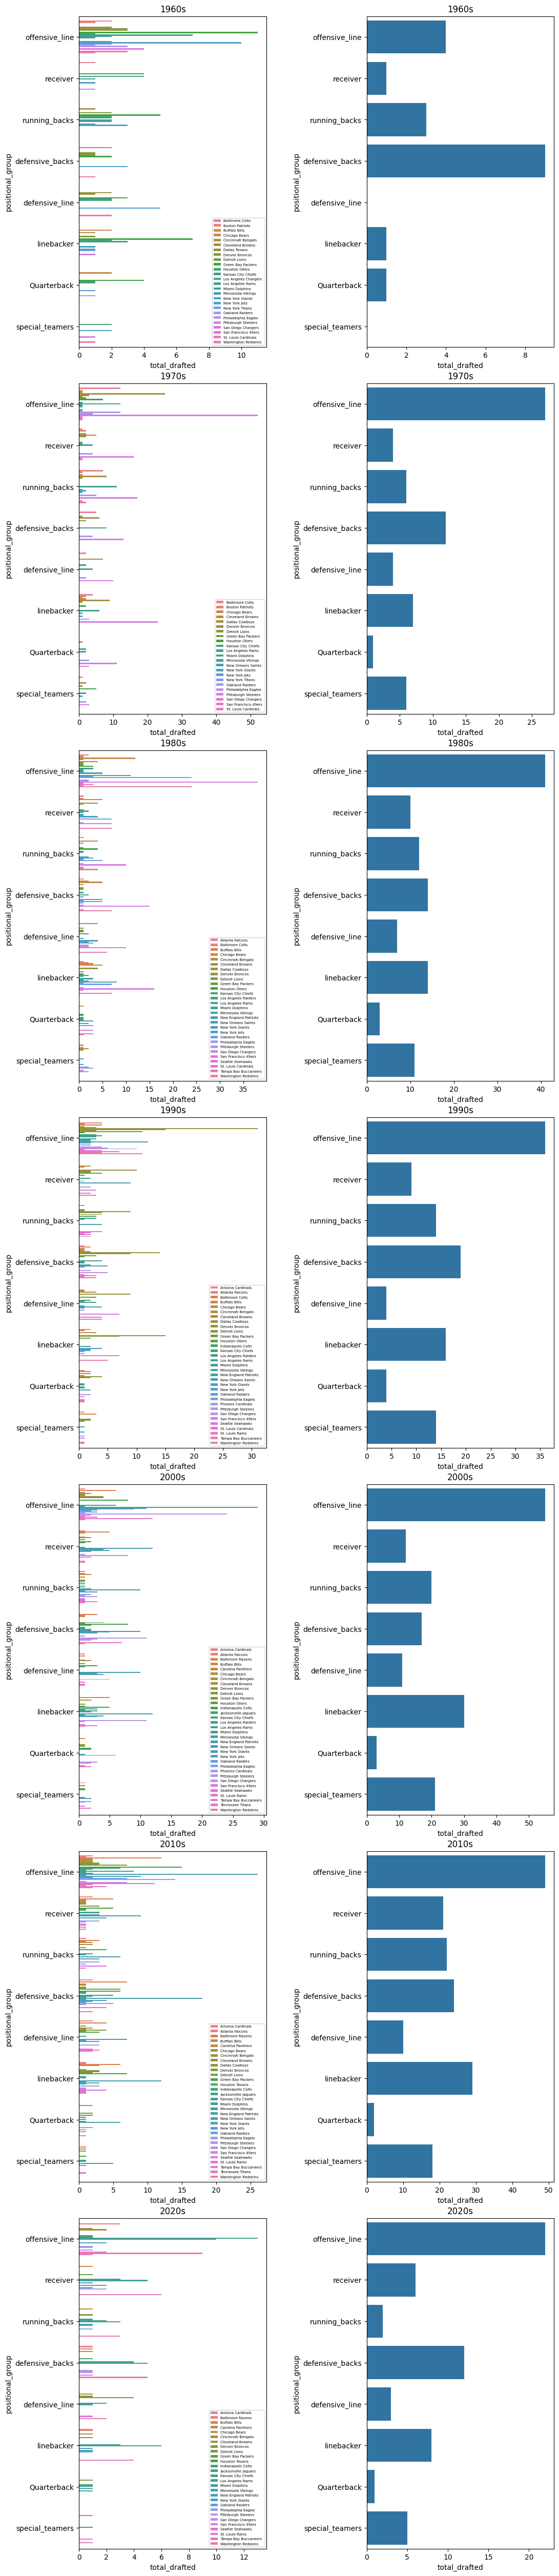

In [86]:
fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_pos_group['decade'].unique():
    data=drafted_sbw_pos_group.loc[drafted_sbw_pos_group['decade'] == decade]
    sns.barplot(data=data.loc[data['drafted_team/undrafted'] != 'Undrafted'], y='positional_group', x='total_drafted', 
                order=positions_order, hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data.loc[data['drafted_team/undrafted'] == 'Undrafted'], y='positional_group', x='total_drafted', order=positions_order, 
                errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

### Player draft analysis conclusions: 

In terms of where players who won super bowls were drafted by or if they were drafted at all, we see that throughout the decades, offensive linemen and defensive backs were the highest volume of players signed to rosters that ended up winning super bowls in their careers. 

The first assumption of why offensive linemen are important: protect the quarterback, and win the game up front for the run game. This assumption was valid for both offensive linemen who were drafted and those who went undrafted. 
The next assumption regarding defensive backs, stop the opposing players ability to pass the ball downfield to limit their overall abilities. 


When looking at the number of teams involved in a superbowl winning team's roster, this showed that typically players were signed from 5-6 different teams (free agency also being a 'team' in this case) per super bowl winning roster, when there are a spread out number of teams winning superbowls in a given decade. 

Finally, for the teams that won multiple super bowls in particular decades, it was clear to see that they drafted a lot of players onto their roster themselves, with the the next typical 'team' being players who went undrafted, which goes to show the importance and significance for an NFL organisation to scout extensively, draft well and never count out undrafted free agents when looking to build a super bowl winning roster.

## College and College Conference Analysis
This section aims to look at where NFL super bowl winners came from in terms of college team and college conference, to give an indication of where the best "feeders" of super bowl winners are, in order for NFL teams to draft from these particular places. 
In order to determine the college's conference, we will join a dataframe for college football team information from Division 1 colleges. 

In [90]:
# import data
sb_winning_rosters = pd.read_csv('../data/cleaned/all_superbowl_winning_rosters_cleaned.csv')

# A function to calculate the decade
def get_decade(year):
    return str(year)[:3] + "0s"

# Apply the function to add the decade column
sb_winning_rosters['decade'] = sb_winning_rosters['year'].apply(get_decade)

In [91]:
# Conference name missing for colleges not successfully matched in merge or not in Division 1. 
# Filling NA with 'Other'
sb_winning_rosters.isna().sum()

sb_winning_rosters['conference_name'] = sb_winning_rosters['conference_name'].fillna('Other')
sb_winning_rosters.head()

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year,positional_group,conference_name,decade
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019,offensive_line,big ten,2020s
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019,defensive_backs,pac-12,2020s
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN,special_teamers,big 12,2020s
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,fbs independent,2020s
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015,offensive_line,big 12,2020s


#### College table

In [ ]:
#create summary table with player counts by college and decade

agg_table_college = sb_winning_rosters.groupby(
    ['decade','team','college']).agg({'player': 'count'})
agg_table_college.reset_index(inplace=True)
agg_table_college.rename(columns={'player': 'player_count'}, inplace=True)

college_table = agg_table_college.groupby(
    ['decade','college']).agg({'player_count': 'sum'}).reset_index()
college_table.head()

In [ ]:
colleges_per_decade = college_table.groupby('decade').agg({'college':'nunique'}).reset_index()
colleges_per_decade.rename(columns={'college': 'college_count'}, inplace=True)
colleges_per_decade

#### Conference table

In [ ]:
#create summary table with player counts by conference and decade

agg_table_conf = sb_winning_rosters.groupby(
    ['decade','team','conference_name']).agg({'player': 'count'})
agg_table_conf.reset_index(inplace=True)
agg_table_conf.rename(columns={'player': 'player_count'}, inplace=True)

conference_table = agg_table_conf.groupby(['decade','conference_name']).agg({'player_count': 'sum'}).reset_index()
conference_table.head(10)

In [ ]:
conferences_per_decade = pd.DataFrame(conference_table.groupby('decade')['conference_name'].nunique().reset_index())
conferences_per_decade.rename(columns={'conference_name': 'conference_count'}, inplace=True)
conferences_per_decade

In [ ]:
# Swarm plot to see what the largest contributing conference in the 90s was. 

plt.subplots(figsize=(20,20))
sns.swarmplot(x = sb_winning_rosters.loc[sb_winning_rosters['decade'] == '1990s']['team'], y = sb_winning_rosters['conference_name'])
plt.show()

### College Visualisations

In [ ]:
sns.barplot(data=colleges_per_decade, y='college_count', x='decade')
plt.title(f'Feeder Colleges per Decade')
plt.show()

# Comments on Feeder Colleges per Decade: 
# considering decates with full data (1970s to 2010s) we can observe an increase of over 28% from
# 77 feeder colleges in 1970s to 99 feeder colleges in 2010s. This suggests the pool of feeder colleges to
# NFL Superbowl winning teams has increased over time. It could also mean that a bigger variety of teams
# have won the superbowl each decade.

In [ ]:
sb_winning_rosters['college'].nunique()

In [ ]:
# create table with player counts grouped by year, college name, filtered for colleges that have at least 3 players 
player_count_college_year = sb_winning_rosters.groupby(['decade','year','team','college']).agg({'player': 'count'})
player_count_college_year.reset_index(inplace=True)
player_count_college_year.rename(columns={'player': 'player_count'}, inplace=True)

# filtered dataframe where winning team has a minimum of n players from same college
min_same_college_player_num=3
player_count_college_year_filtered = player_count_college_year[player_count_college_year['player_count']>=min_same_college_player_num]

# df showing year and winning team, with number of player_colleges 
# from which a min of n players came from at the time of the winning year
player_count_college_year_summary = player_count_college_year_filtered.groupby(['year','team']).agg({'college': ['count', 'unique']})
player_count_college_year_summary.reset_index(inplace=True)
player_count_college_year_summary.rename(columns={'college': 'college_count'}, inplace=True)

# fix column names:
player_count_college_year_summary.columns = player_count_college_year_summary.columns.droplevel(0)
player_count_college_year_summary.columns = ['year', 'team', 'college_count', 'college_names']

In [ ]:
# Visualising scatterplot for the number of colleges providing super bowl winning players by year to 
# investigate for potential trend, where minimum number of players from the same college is n:
# in this case 3
sns.scatterplot(data=player_count_college_year_summary, y='college_count', x='year')
plt.show()

In [ ]:
# College ranking per decade

t_college_table = college_table.copy()
t_college_table['player_count_rank'] = college_table.groupby(['decade'])['player_count'].rank(method='min', ascending=False)
t_college_table_sorted = t_college_table.sort_values(['decade','player_count_rank'], ascending=True)
t_college_table_sorted[t_college_table_sorted['player_count_rank']<2]

# Looking at the top colleges that provide the most super bowl winning players by decade.

Comments on top feeder colleges per decade:

 for decades with full yearly data, it can be observed that in 1970s the top college contributed 16 players
 
 to the decade's winning teams, whereas in 2010s this number was 17. Most Decade-feeder colleges appear only
 
 once in the list excep for LSU, being the top college for two decades in a row.

In [ ]:
# Visualization: feeder top colleges by decade 
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

for decade in decade_order:
    fig, ax = plt.subplots(figsize=(5, 4))
    # create df of selected decade
    data_decade = college_table[college_table['decade'] == decade]
    
    # calculate selected quantile for number of players per college
    quantile=0.9
    quantile_value = data_decade['player_count'].quantile(q=quantile)
    
    # create filtered dataframe based on selected quantile
    college_table_above_quantile = college_table[college_table['player_count'] > quantile_value]
    data_sorted= college_table_above_quantile[college_table_above_quantile['decade'] == decade].sort_values('player_count', ascending=False)
    
    #create barplot
    sns.barplot(data=data_sorted, y='college', x='player_count')
    ax.set_xlim([0, 20])
    plt.title(f'Barplot for Decade: {decade}')
    plt.show()

Coments:
These barplots show the top 10% of feeder colleges to Superbowl winning teams per decade
Colleges feed players into the NFL through drafts and other transactions.
From a team manager's perspective, it could be worthwhile to focus on top conferences that have a track record of providing Superbowl winning players. Over the most recent decades (2000s, 2010s, 2020s) LSU has been the top feeder college, with Washington taking the lead in these first years
of 2020s.
Previous top colleges like Miami (FL) have decreased their contribution in number of players, dropping to third place in 2000s and to 8th place in 2010s,
Alongside LSU, the most recently successful colleges would be in 2020s Washington and Oklahoma, and in 2010s Tennessee and Oregon.


In [99]:
# Looking at super bowl winning positional groups from particular colleges

positional_groups_college = sb_rosters.groupby(['decade', 'positional_group', 'college']).agg({'years_in_league':'mean', 'player':'count'}).reset_index()
positional_groups_college

,decade,positional_group,college,years_in_league,player
0,1960s,Quarterback,alabama,8.0,3
1,1960s,Quarterback,cincinnati,9.0,1
2,1960s,Quarterback,georgia,12.5,2
3,1960s,Quarterback,kentucky,16.0,1
4,1960s,Quarterback,pacific,9.0,1
...,...,...,...,...,...
1960,2020s,special_teamers,oklahoma,7.0,1
1961,2020s,special_teamers,oklahoma st.,1.0,1
1962,2020s,special_teamers,oregon st.,9.0,1
1963,2020s,special_teamers,south carolina,11.0,1


In [130]:
# Look at last 3 decades and 2010s in separate df.
twentytens_positional_college = positional_groups_college.loc[positional_groups_college['decade'].isin(['2010s'])]
last_3_decades_positional_college = positional_groups_college.loc[positional_groups_college['decade'].isin(['2020s', '2010s', '2000s'])]

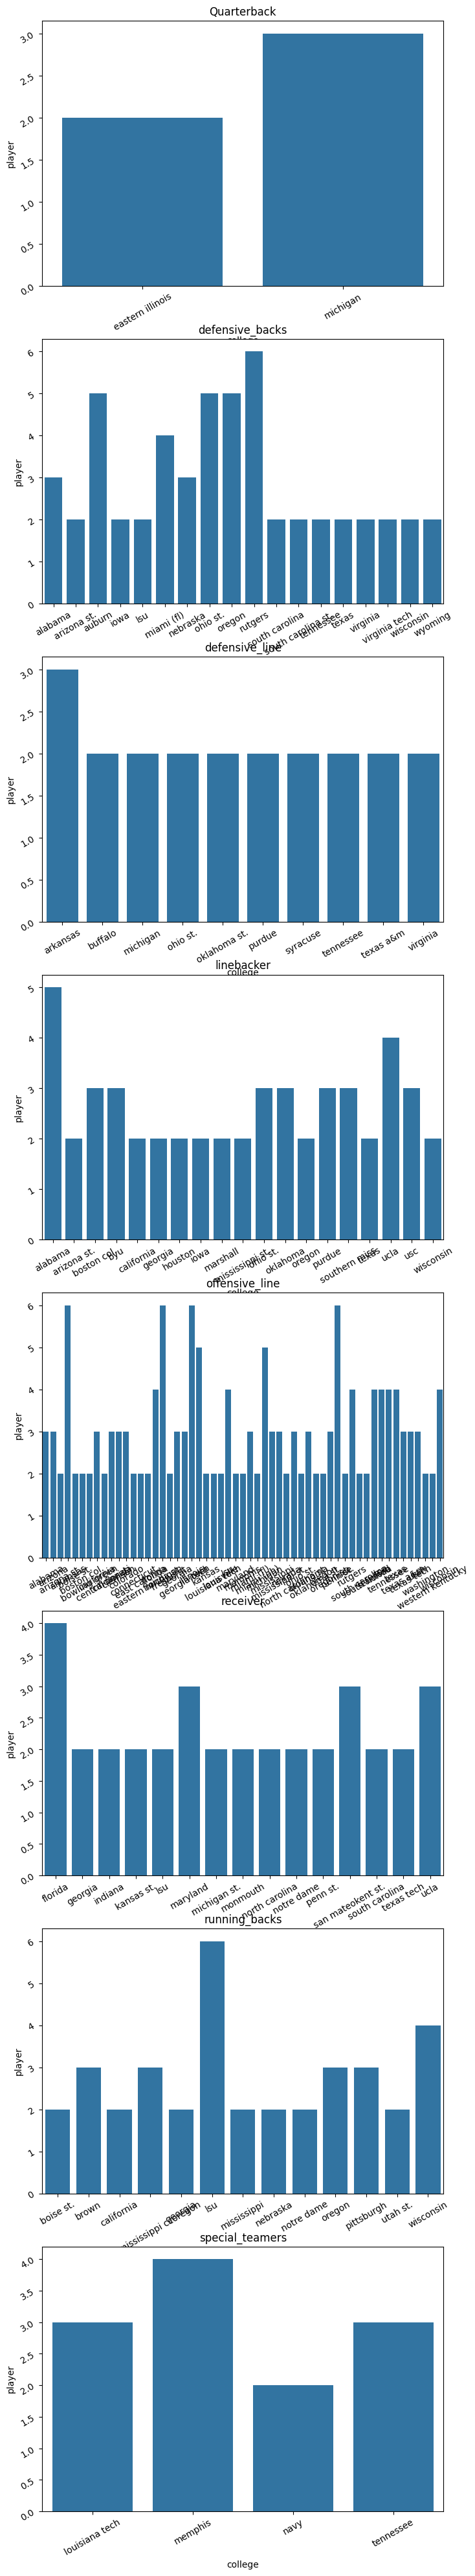

In [155]:
fig, ax = plt.subplots(len(list(twentytens_positional_college['positional_group'].unique())), 1, figsize=(8,50))
i = 0         
q = 0.5
for position in twentytens_positional_college['positional_group'].unique():
    quantile_value = twentytens_positional_college['player'].quantile(q=q)
    sns.barplot(data=twentytens_positional_college.loc[(twentytens_positional_college['positional_group'] == position) &
                (twentytens_positional_college['player'] >  quantile_value)], 
        x='college', y='player', 
        errorbar=None, ax=ax[i]).set_title(position)
    ax[i].tick_params(labelrotation=30)
    i += 1
plt.show()

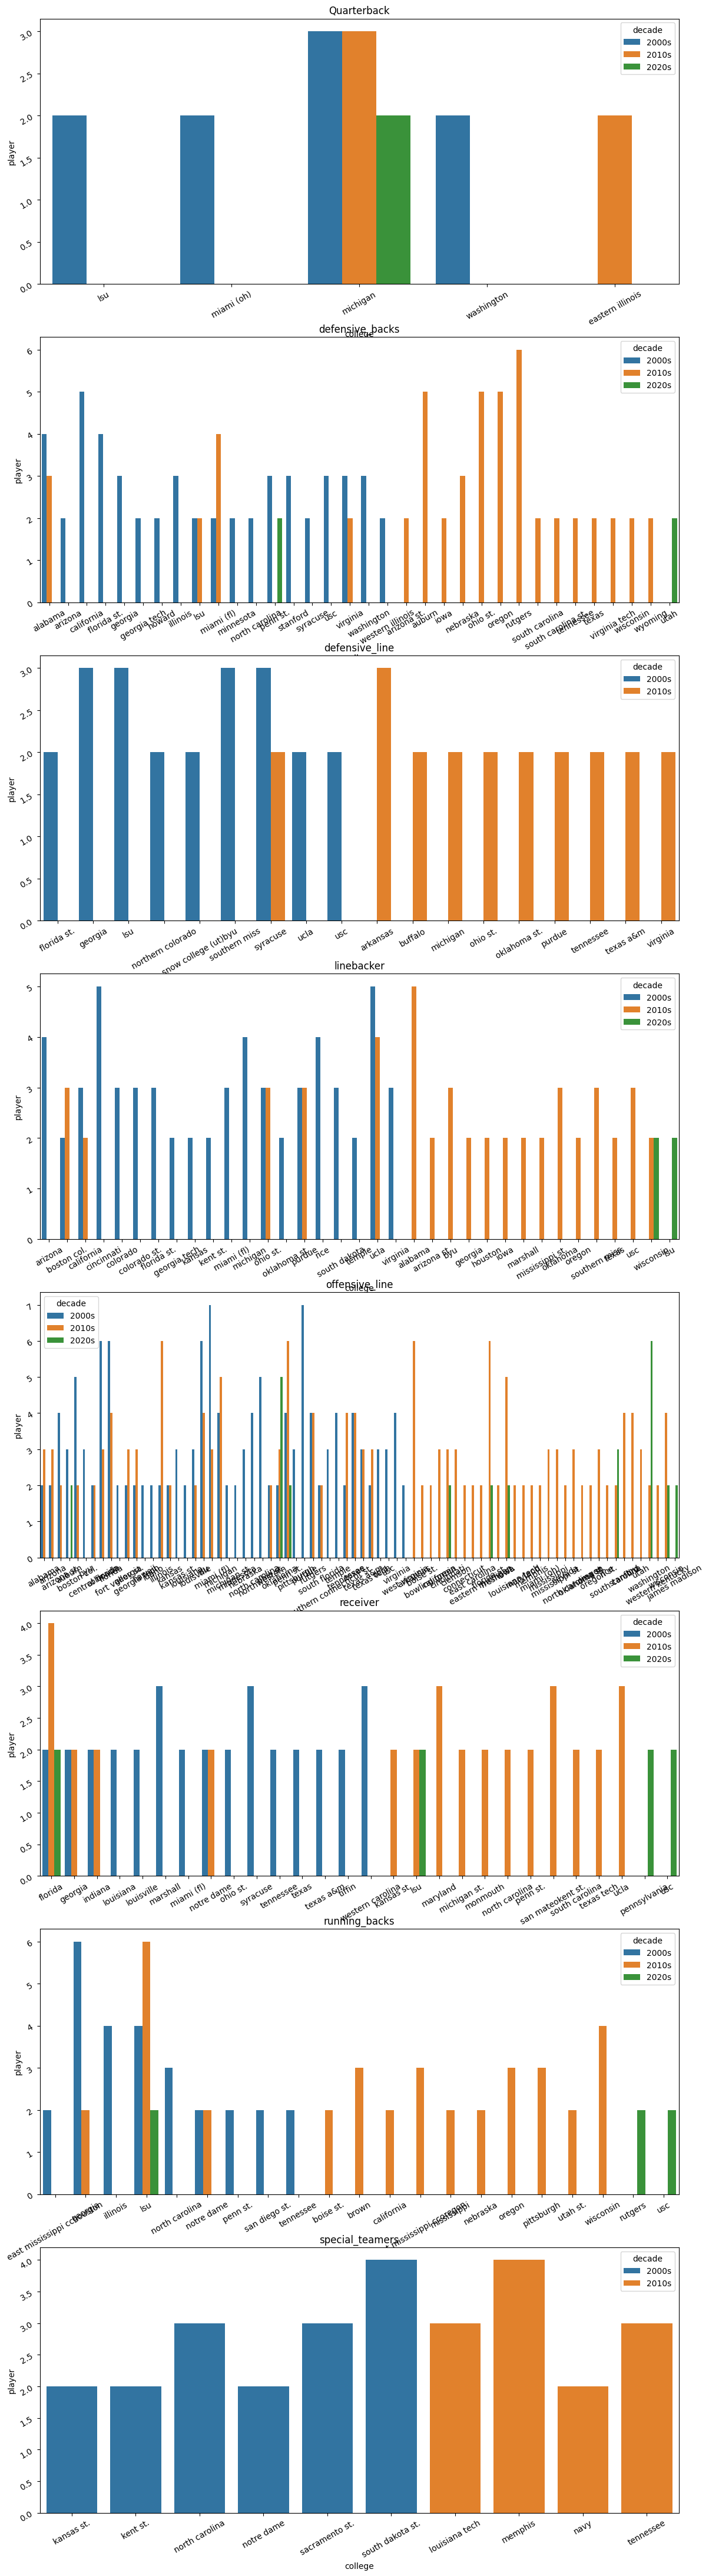

In [149]:
fig, ax = plt.subplots(len(list(last_3_decades_positional_college['positional_group'].unique())), 1, figsize=(14,55))
i = 0         
q = 0.5
for position in last_3_decades_positional_college['positional_group'].unique():
    quantile_value = last_3_decades_positional_college['player'].quantile(q=q)
    sns.barplot(data=last_3_decades_positional_college.loc[(last_3_decades_positional_college['positional_group'] == position) &
                (last_3_decades_positional_college['player'] >  quantile_value)], x='college', y='player', errorbar=None, 
                hue='decade', ax=ax[i]).set_title(position)
    
    ax[i].tick_params(labelrotation=30)
    
    i += 1
    
plt.show()

### Charts: Conferences

In [ ]:
# Visualising number of super bowl players' colleges by decade

sb_winning_rosters = sb_winning_rosters.sort_values('decade', ascending=True)

for decade in sb_winning_rosters['decade'].unique():
    data_filtered = sb_winning_rosters[sb_winning_rosters['decade'] == decade]
    sns.countplot(data=data_filtered, x='conference_name')
    plt.title(f'Countplot for Decade: {decade}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# calculate selected quantile for number of players per conference
quantile_conf=.5 
quantile_value_conf= conference_table['player_count'].quantile(q=quantile_conf)

# create filtered dataframe based on selected quantile
conf_table_above_quantile = conference_table[conference_table['player_count'] > quantile_value_conf]

sns.barplot(data=conf_table_above_quantile, x='decade', y='player_count', hue='conference_name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Comments:
taking only the conferences that contributed more than the 70 Percentile winning-team players per decade
we can observe this is a relatively small group and also relatively stable.
There is a growing trend in the conference 'big ten' that is visible from 1970s to 2010s
Whereas in 2010s the top conference was 'sec', after increasing its contribution decade over decade since the 1970s.
Others, such as 'pac-12' have experienced relative stability over the decades 1980s through 2010s, but seemingly on a decreasing trend.

In the role of a team manager we would suggest to focus on top conferences that have a track record of contributing players to Superbowl winning teams. Most recently these would be sec, big ten, pac-12, and acc. 

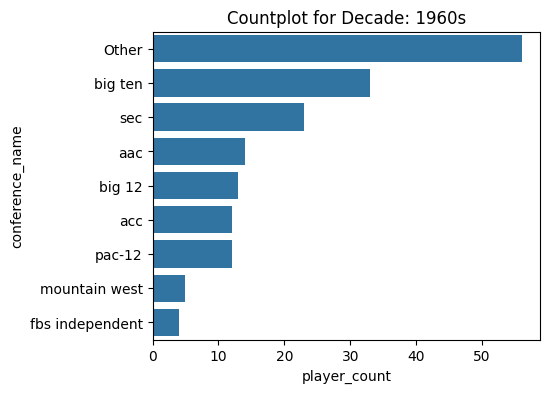

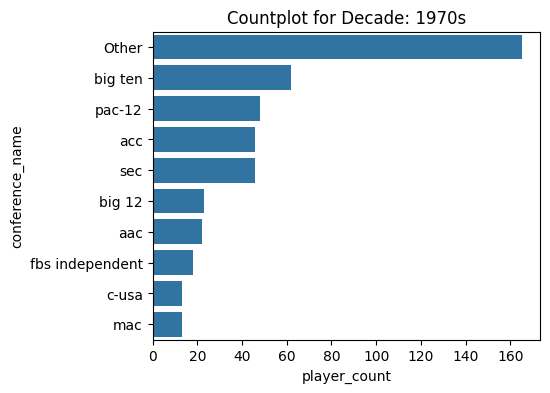

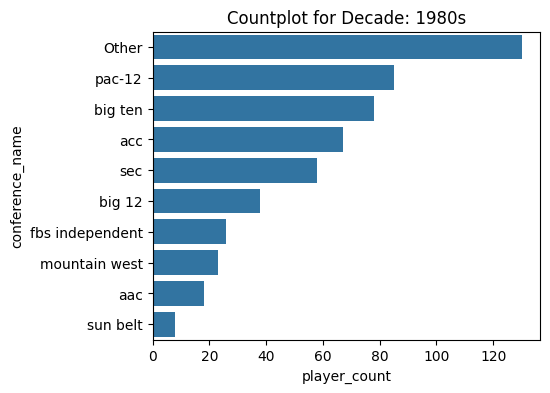

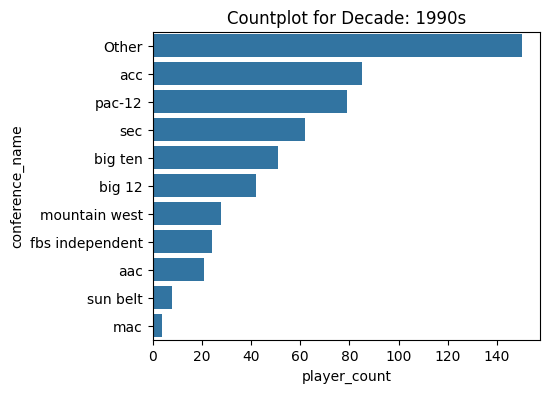

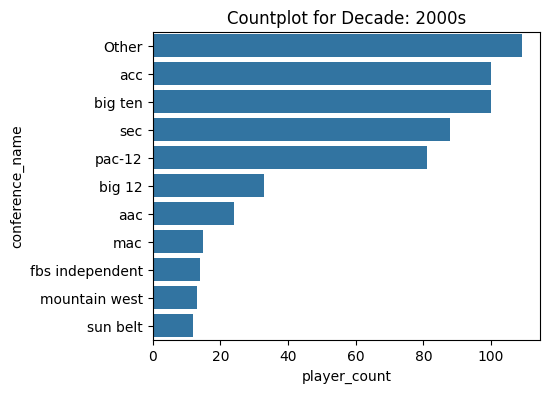

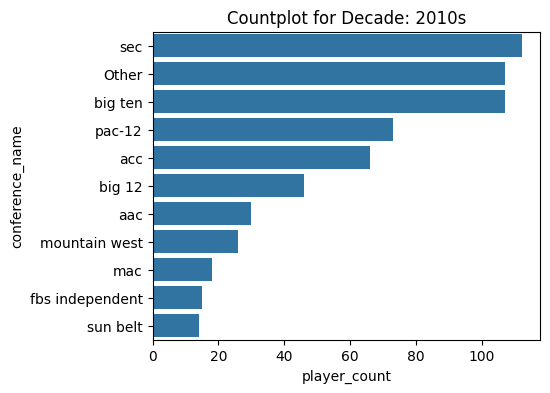

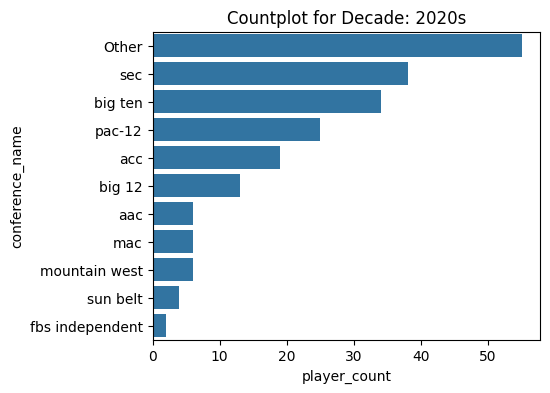

In [130]:
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

for decade in decade_order:
    fig, ax = plt.subplots(figsize=(5, 4))

    # create df of selected decade
    data_decade = conference_table[conference_table['decade'] == decade]
    
    # calculate selected quantile for number of players per conference
    quantile=0
    quantile_value = data_decade['player_count'].quantile(q=quantile)
    
    # create filtered dataframe based on selected quantile
    conf_table_above_quantile = conference_table[conference_table['player_count'] > quantile_value]
    
    data_sorted= conf_table_above_quantile[conf_table_above_quantile['decade'] == decade].sort_values('player_count', ascending=False)
    sns.barplot(data=data_sorted, y='conference_name', x='player_count')
    plt.title(f'Countplot for Decade: {decade}')

plt.show()

### Conclusion on College and Conferences
#### Colleges
In conclusion to super bowl winning players and the colleges they played at, super bowl calibre players can be found from many colleges, and this number has increased over the decades. The typical number of colleges centering around 175 per decade. The total number of unique colleges in the super bowl winning roster file is 442, suggesting that these colleges also follow trends for the decades in terms of the calibre of player required for winning a super bowl. 

When looking at colleges that provided more than 'n' (in this case, n=3) players to super bowl winning teams within a particular timeframe, the average number of colleges providing n players to super bowl winning teams per year looked to normalise around an average of 3 after 1995. 
In this case, demonstrated in the scatterplot from college_count vs year, this would mean the super bowl roster for that year had an average of 3 colleges providing 3 or more players on that team, indicating either there are particular college football teams with a better reputation for creating super-bowl winning calibre players, or that these teams want players to come into their organisations with a familiar feel to put them in the best position to win straight away in the league. 

Looking at the top college feeders per decade, where the amount of players averaged 16 from the 'top' college, LSU (Lousiana State University) is the only college which was the top university in multiple decades for super bowl winning players. 
Other teams included Miami University in the 90s, an infamous generation of players like Ed Reed and Ray Lewis, and UCLA, Nebraska and Colorado in the 80s. 

What this could mean for NFL organisations: the chances of finding potential super bowl winners would increase if they are able to draft or sign players from these 'top' colleges, provided the colleges' performance statistics and coaching staff are remaining constant. If the NFL teams are able to sign multiple players from the same college, whether this leads to increased comraderie between team mates early on, or matches their team system of playing, they could look to sign multiple players from an average of 3 different colleges to match the trends of recent super bowl winning rosters. 

However, this should be taken with the consideration that the college football playing landscape has changed drastically with the introduction of NIL and college players now being able to legally accept compensation for their likeness, effectively being able to be paid as college athletes, as this was not the case before, and wouldn't be included in the time frame for this dataset. Certain colleges might become more attractive for top student athletes to attend in order to earn more money based on the university's reputation or potential reputation. 


#### Conferences 

For college conferences, particularly Division 1 in this analysis, the trend for super bowl winning players and their college conference showed that the SEC, Big 10 and Pac-12 tended to be the best conferences, indicating their level of higher competition degree, making colleges in these conferences more attractive for NFL execs to fill their rosters with players from there. 

It is also worth considering that the 'Other' for conferences is significantly large, indicating there are super-bowl winning calibre players in other colleges and divisions of college football, as well as abroad in places other than american college football teams. However, due to the limits on this current dataset, we were unable to dig further into this 'Other' category to find out any potential trends outside of Division 1 football conferences.  

